In [ ]:
import IPython.display as ipd # Para reproducir audio en el Jupyter Notebook
import numpy as np
import pandas as pd


#Importar Modulo scipy para leer y grabar audio
from scipy.io import wavfile
import matplotlib.pyplot as plt #Libreria para realizar graficos
from scipy.fftpack import fft # modulo para calcular la transformada de fourier



In [ ]:

from google.colab import drive
import os
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/FComputacional/Notebooks/Clase7TransformadadeFourier'

/content/gdrive/MyDrive/FComputacional/Notebooks/Clase7TransformadadeFourier


In [ ]:
# Reproducimos
#AudioEstereo= "canar.wav" # Archivo de Audio
AudioMono = "Owl.wav"

Duracion = 1.765079365079365 , Frecuencia de Muestreo = 22050 [=] Muestras/Seg, Wav format = int16


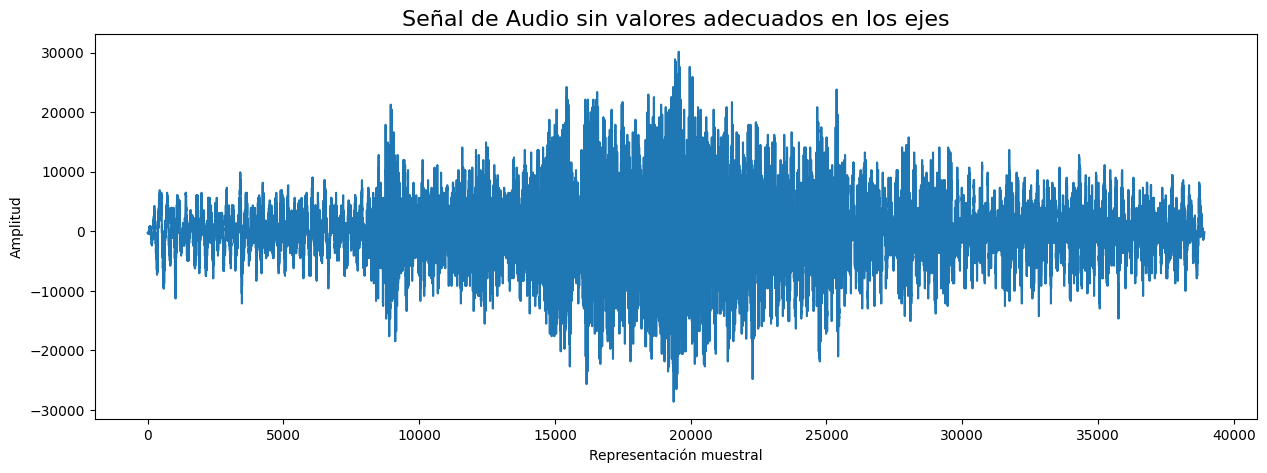

In [ ]:
## Graficamos
fs, Audiodata = wavfile.read(AudioMono)
print(f'Duracion = {Audiodata.shape[0]/fs} , Frecuencia de Muestreo = {fs} [=] Muestras/Seg' \
      f', Wav format = {Audiodata.dtype}')


plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(Audiodata) # Audiodata es un numpy array
plt.title('Señal de Audio sin valores adecuados en los ejes',size=16);
plt.ylabel('Amplitud'); plt.xlabel('Representación muestral');

In [ ]:
ipd.Audio(AudioMono)

## Si sospechas que tu archivo de audio es estereo, entonces corre la siguiente celda, si no. Sólo coméntala.

In [ ]:
## Si sospechas que tu archivo de audio
print(Audiodata)   ### Sooooospechoso (En vez de arrojar)
print("%%%%%%%%%%%%%%%%%%%%%")



print(Audiodata[:,0])

Audiodata = Audiodata[:,0]

[-274 -280 -287 ... -176 -154 -137]
%%%%%%%%%%%%%%%%%%%%%


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

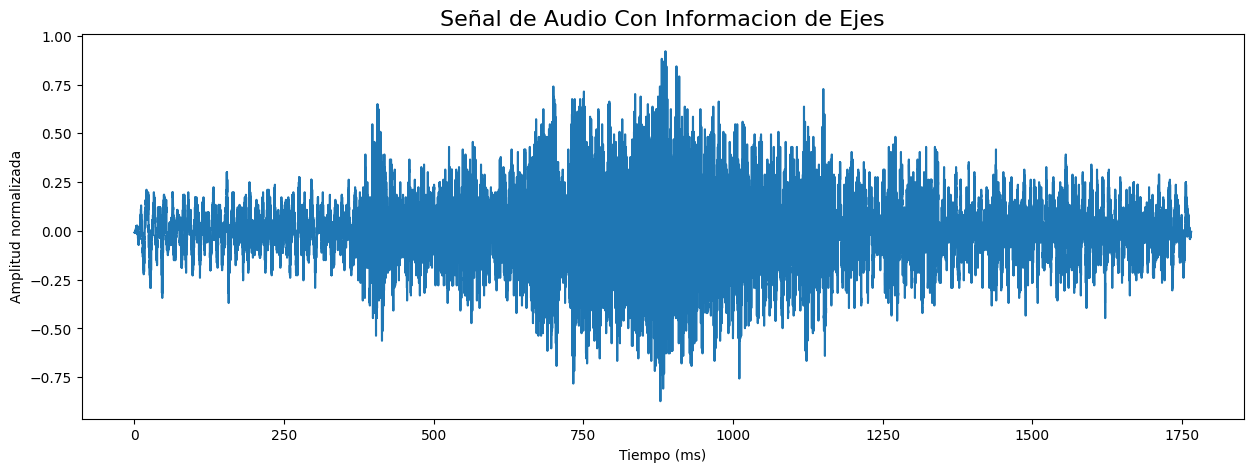

In [ ]:
## Reescalamos
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
# Definir los valores de los datos de amplitud entre [-1 : 1] Audiodata.dtype es int16
AudiodataScaled = Audiodata/(2**15)

#definir los valores del eje x en milisegundos
timeValues = np.arange(0, len(AudiodataScaled), 1)/ fs # Convertir Muestras/Seg a Segundos
timeValues = timeValues * 1000  #Escala de tiempo en milisegundos

plt.plot(timeValues, AudiodataScaled);plt.title('Señal de Audio Con Informacion de Ejes',size=16)
plt.ylabel('Amplitud normalizada'); plt.xlabel('Tiempo (ms)');

In [ ]:
#

n = len(Audiodata)#Queremos saber el total de nuestros datos muestreados
print(n) #

F= fs*np.arange(0,n//2)/n
AudioFreq = np.fft.fft(AudiodataScaled) # Calcular la transformada de Fourier
# La salida de la FFT es un array de numeros complejos
print(f'Tipo de datos de la fft = {AudioFreq.dtype} un valor cualquiera es = {AudioFreq[100]}')


38920
Tipo de datos de la fft = complex128 un valor cualquiera es = (69.25524950554176+16.250615525323425j)


Text(0.5, 0, 'Hz')

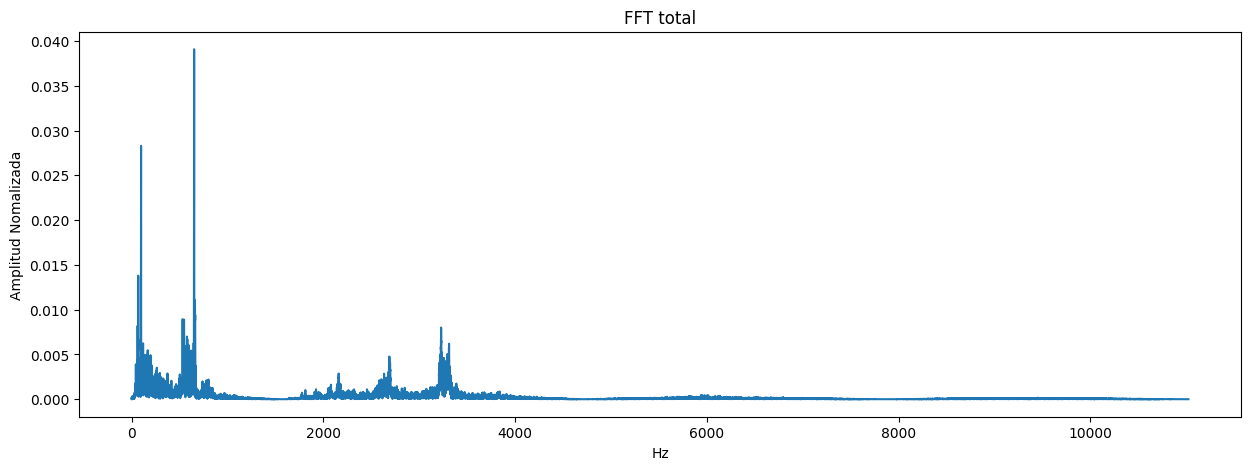

In [ ]:
MagFreq = np.abs(AudioFreq) # Valor absoluto para obtener la magnitud

# Escalar por el numero de puntos para evitar que los valores de magnitud
# dependan del tamaño de la señal o de su frecuencia de muestreo
MagFreq = MagFreq[:19460] / float(n) #Limitamos a 19460, ya que es la primera mitad de las muestras de n, ya que la transformada de fourier siempre "se refleja" duplicando la información

plt.plot(F,MagFreq) #Espectro de magnitud
plt.ylabel('Amplitud Nomalizada'); plt.title('FFT total'); plt.xlabel('Hz')

In [ ]:
# Graficamos con iplot

from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


cf.go_offline()




init_notebook_mode(connected=False)




def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd

print(type(MagFreq))
NuevoDataFrame = pd.DataFrame(MagFreq,F) #Pasamos "MagFreq" y "F" de un array de numpy a un dataframe para poder hacer una gráfica interactiva con "plotly"
print(type(NuevoDataFrame))

#Configuramos plotly para el gráfico
configure_plotly_browser_state()
NuevoDataFrame.iplot(kind='line', mode='lines',title='Transformada de Fourier del ulular de un buho y otra ave')

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
